# Análise Exploratória de Dados (EDA) - Diamonds

### Descrição da base de dados

A base de dados utilizada para desenvolver o projeto foi a *Diamonds*, disponibilizada pelo *Seaborn*. Ela contém dados de diversos diamantes, sua estrutura está representada na tabela a seguir:

| Colunas  | Descricao   | Tipo | Classificação |
| ------- | -------- | -------  | -------  |
| Carat  | Peso do diamante em gramas (quilates)  | Numérico| Quantitativa Contínua |
| Cut  | Qualidade do corte    | Categórico		| Qualitativas Ordinal|
| Color  | Cor do diamante    |	Categórico		| Qualitativas Nominal |
| Clarity  | Clareza/Pureza do diamante    |	Categórico		| Qualitativas Ordinal |
| Depth | Porcentagem total de profundidade, dado pela fórmula (z / mean(x, y)) = 2 * z / (x + y)    |	Numérico	| Quantitativa Contínua |
| Table | Largura do ponto mais largo do diamante    |	Numérico	| Quantitativa Contínua |
| Price  | Preço do diamante em dólar  |	Numérico	| Quantitativa Contínua |
| X  | Comprimento em milímetros   |	Numérico	| Quantitativa Contínua |
| Y | Largura em milímetros    |	Numérico	| Quantitativa Contínua |
| Z | Profundidade em milímetros   |	Numérico	| Quantitativa Contínua |


Possuindo as informações iniciais sobre a base de dados:
 - Motivação: Relação entre preço e características dos diamantes.
 - Hipotese: O preço dos diamantes aumenta de acordo com suas características.

### Análises Iniciais

#### Importando as bibliotecas

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Importando a base de dados

In [42]:
diamonds = sns.load_dataset('diamonds')


#### Informações sobre as colunas e dados

In [43]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [45]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [46]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

##### Distribuição dos dados nos valores categóricos

In [47]:
diamonds['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Os tipos seguem essa ordem de "qualidade": (Fair (Pior), Good, Very Good, Premium, Ideal (Melhor))

In [48]:
diamonds['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

Os tipos seguem essa ordem de "qualidade": (J (Pior), I, H, G, F, E, D (Melhor))

In [49]:
diamonds['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

Os tipos seguem essa ordem de "qualidade": (I1 (Pior), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (Melhor))

##### Assimetria dos valores

In [50]:
diamonds['carat'].skew()

1.116645920812613

In [51]:
diamonds['depth'].skew()

-0.08229402630189467

Se aproxima bastante de uma distribuição simétrica

In [52]:
diamonds['table'].skew()

0.7968958486695427

In [53]:
diamonds['price'].skew()

1.618395283383529

In [54]:
diamonds['x'].skew()

0.3786763426463927

In [55]:
diamonds['y'].skew()

2.4341667164885554

In [56]:
diamonds['z'].skew()

1.5224225590685583

As assimetrias tiveram a seguinte distribuição:

| Direita (valores acima da média) |
|------|
| Carat|
|Table|
|Price|
|X|
|Y|
|Z|

 Esquerda (valores abaixo da média)| 
|------|
| Depth|

### Visualização dos dados

##### Distribuição dos valores categóricos:

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\3661471048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diamonds, x=i,palette='plasma' , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\3661471048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diamonds, x=i,palette='plasma' , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\3661471048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diamonds, x=i,palette='plasma' , ax=axes[idx]).set_title(i)


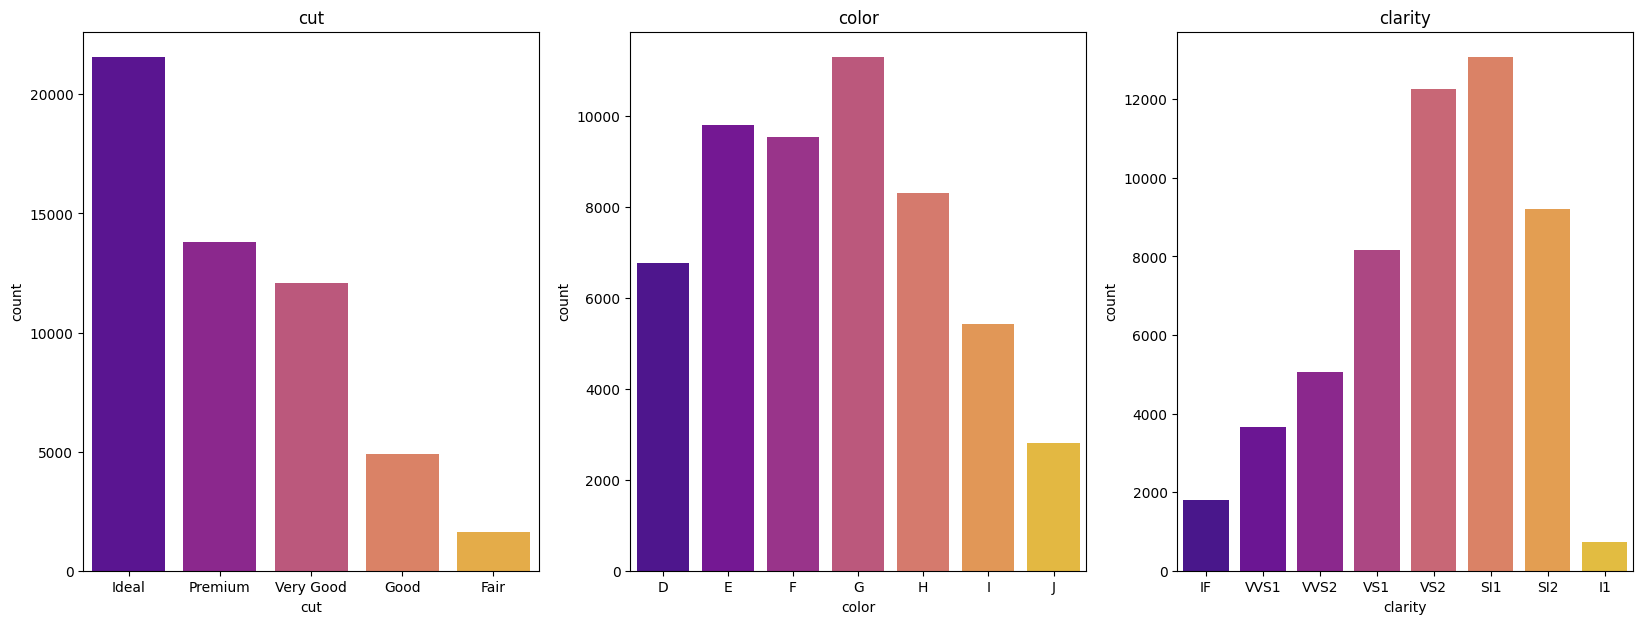

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
idx = 0
for i in ['cut', 'color', 'clarity']:
    sns.countplot(data=diamonds, x=i,palette='plasma' , ax=axes[idx]).set_title(i)
    idx += 1
plt.show()

 - Algumas cores são mais comuns que outras, com distribuição aleatória.

 - Clareza tem distribuição normal, com alguma assimetria à esquerda.

#### BoxPlot:

##### Tamanho (X, Y, Z e Depth):

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\2626272148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx], orient='v').set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\2626272148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx], orient='v').set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\2626272148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx], orient='v').set_title(i)
C

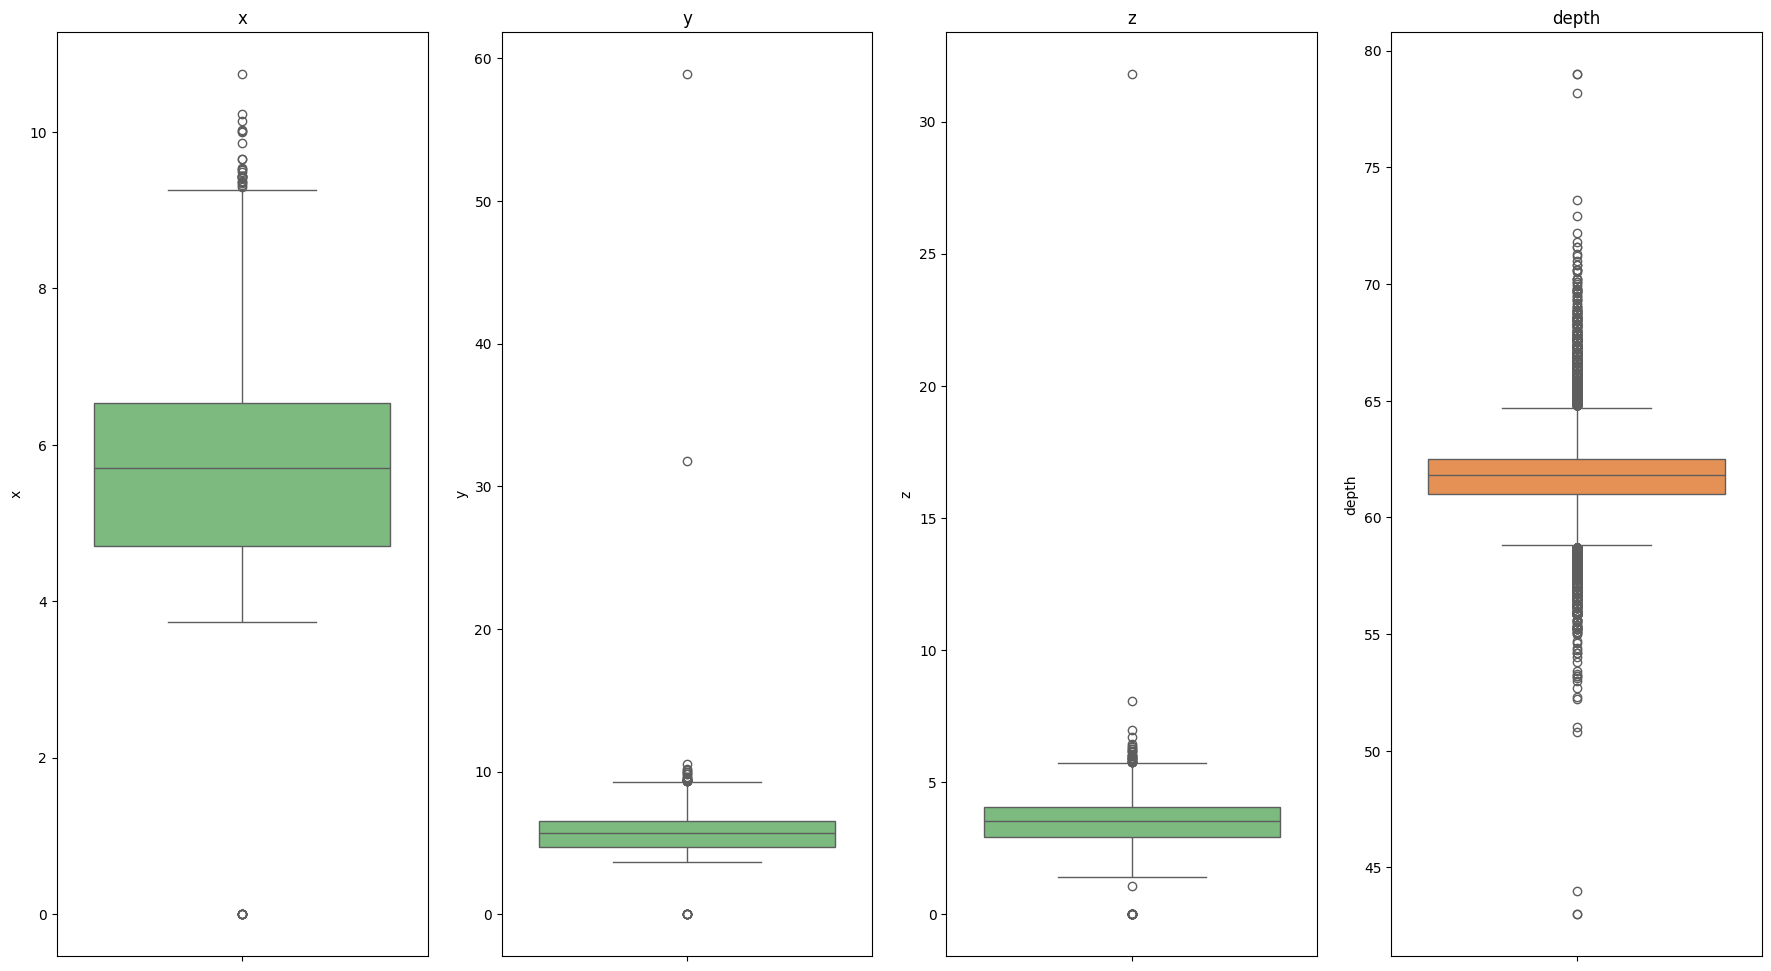

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22,12))
idx = 0
for i in ['x', 'y', 'z', 'depth']:
    palet = ('Greens' if i in 'xyz' else 'Oranges')
    sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx], orient='v').set_title(i)
    idx += 1
plt.show()

Os valores de X, Y e Z apresentam uma grande variação quando comparado com a profundidade. A profundidade deveria ser calculada a partir da equação: 2z/(x+y). Por tanto, para remover os outliers, devemos: 
 - Remover os zeros.
 - Remover os que têm profundidade (com diferença maior que 1) da profundidade calculada com a fórmula.

In [59]:
diamonds['calc_depth'] = round(diamonds.z * 2 / (diamonds.x + diamonds.y) * 100,1)
diamonds.drop(diamonds[(diamonds.x == 0) | (diamonds.y == 0) |(diamonds.z == 0) |(diamonds.depth == 0)|(diamonds.y > 20) 
                       | (diamonds.z > 10)| (diamonds.z < 1.1)].index, inplace=True)
diamonds.drop(diamonds[np.abs(diamonds.depth - diamonds.calc_depth) > 1].index, inplace=True)
diamonds.drop(columns='calc_depth', axis=1, inplace=True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Plotando o gráfico novamente:

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\1505352628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\1505352628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\1505352628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx]).set_title(i)
C:\Users\artur\AppData\Local\Temp\ipy

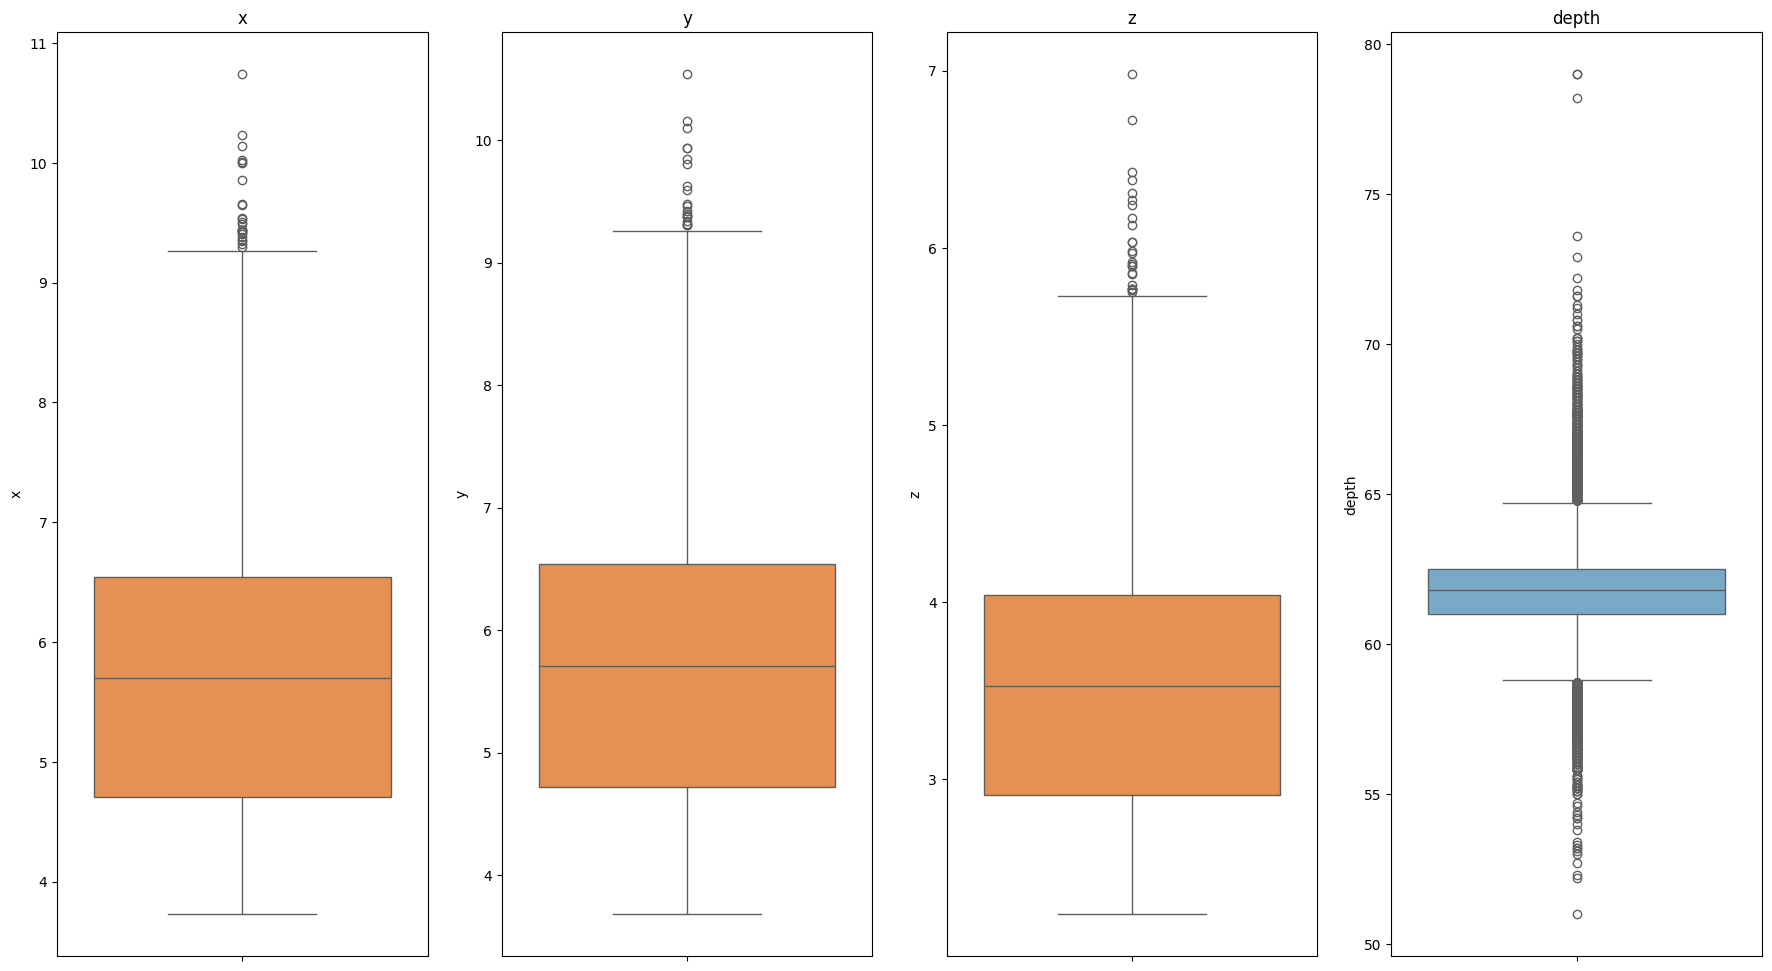

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22,12))
idx = 0
for i in ['x', 'y', 'z', 'depth']:
    palet = ('Oranges' if i in 'xyz' else 'Blues')
    sns.boxplot(y=diamonds[i],palette=palet , ax=axes[idx]).set_title(i)
    idx += 1
plt.show()

Agora as medidas são mais compativeis com a profundidade.

##### Carat e Depth:

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\3239607737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['carat'],palette='mako' ,ax=axes[0], orient='h').set_title('Carat Boxplot')
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\3239607737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['table'],palette='mako',ax=axes[1], orient='h').set_title('Table Boxplot')


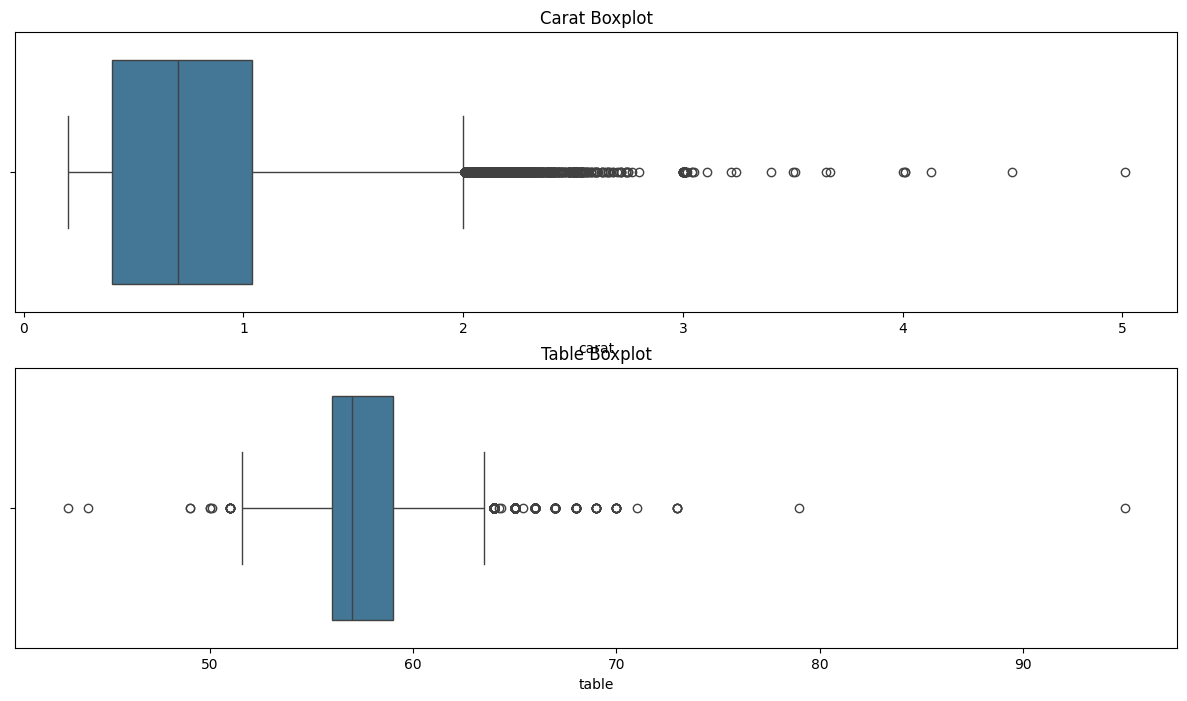

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=False, sharey=False)
sns.boxplot(diamonds['carat'],palette='mako' ,ax=axes[0], orient='h').set_title('Carat Boxplot')
sns.boxplot(diamonds['table'],palette='mako',ax=axes[1], orient='h').set_title('Table Boxplot')
plt.show()

In [62]:
carat_q1, carat_q3 = diamonds.carat.quantile(.25), diamonds.carat.quantile(.75)
table_q1, table_q3 = diamonds.table.quantile(.25) , diamonds.table.quantile(.75)

carat_upper = carat_q3 + (carat_q3 - carat_q1)*1.5
carat_lower = carat_q1 - (carat_q3 - carat_q1)*1.5

table_upper = table_q3 + (table_q3 - table_q1)*1.5
table_lower = table_q1 - (table_q3 - table_q1)*1.5

Para a identificação de outliers, foi-se utilizado o IQR (intervalo interquartil), que nos trouxe a seguinte quantidade de valores:

In [63]:
diamonds[(diamonds.carat>carat_upper)|(diamonds.carat<carat_lower)].count()[0]

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\854790693.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diamonds[(diamonds.carat>carat_upper)|(diamonds.carat<carat_lower)].count()[0]


1880

In [64]:
diamonds[(diamonds.table>table_upper)|(diamonds.table<table_lower)].count()[0]

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\1545641619.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  diamonds[(diamonds.table>table_upper)|(diamonds.table<table_lower)].count()[0]


601

Mesmo sendo uma quantidade pequena de valores, iremos remove-los, para uma melhor análise.

In [65]:
diamonds.drop(diamonds[(diamonds.carat > carat_upper) | (diamonds.carat < carat_lower)].index, inplace=True)
diamonds.drop(diamonds[(diamonds.table > table_upper) | (diamonds.table < table_lower)].index, inplace=True)

Plotando o gráfico novamente:

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\3239607737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['carat'],palette='mako' ,ax=axes[0], orient='h').set_title('Carat Boxplot')
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\3239607737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['table'],palette='mako',ax=axes[1], orient='h').set_title('Table Boxplot')


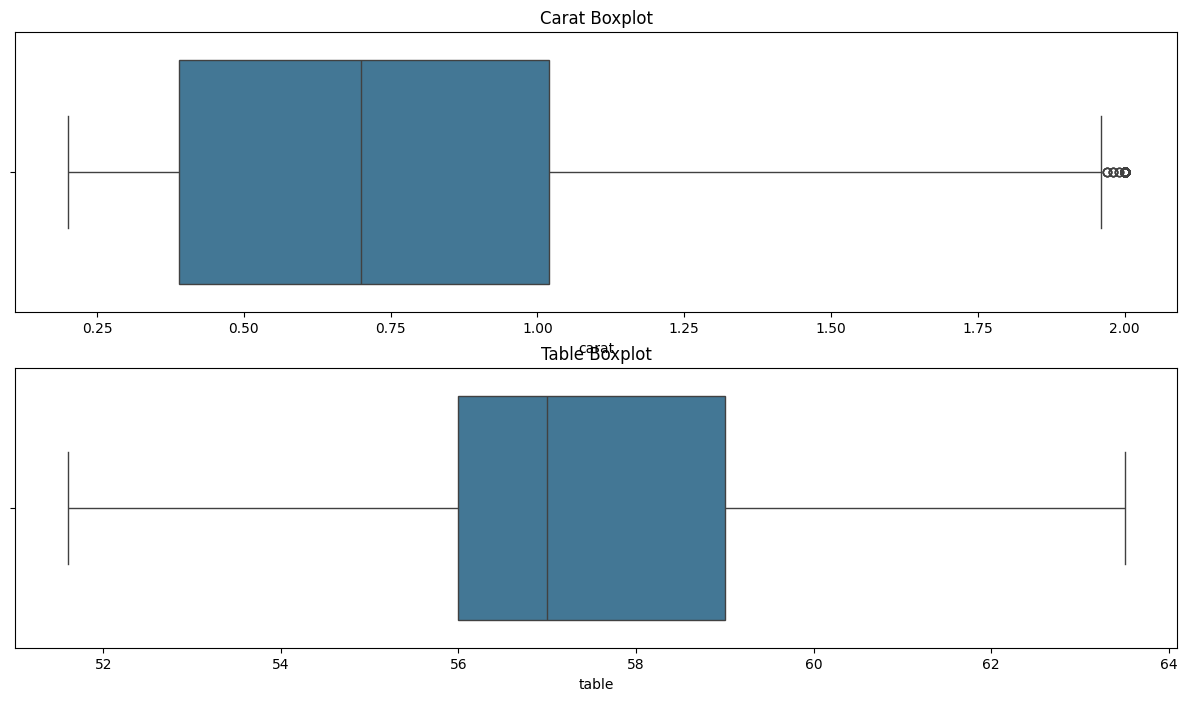

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,8), sharex=False, sharey=False)
sns.boxplot(diamonds['carat'],palette='mako' ,ax=axes[0], orient='h').set_title('Carat Boxplot')
sns.boxplot(diamonds['table'],palette='mako',ax=axes[1], orient='h').set_title('Table Boxplot')
plt.show()

##### Price:

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\1124197547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['price'],palette='flare', orient='h')


<Axes: xlabel='price'>

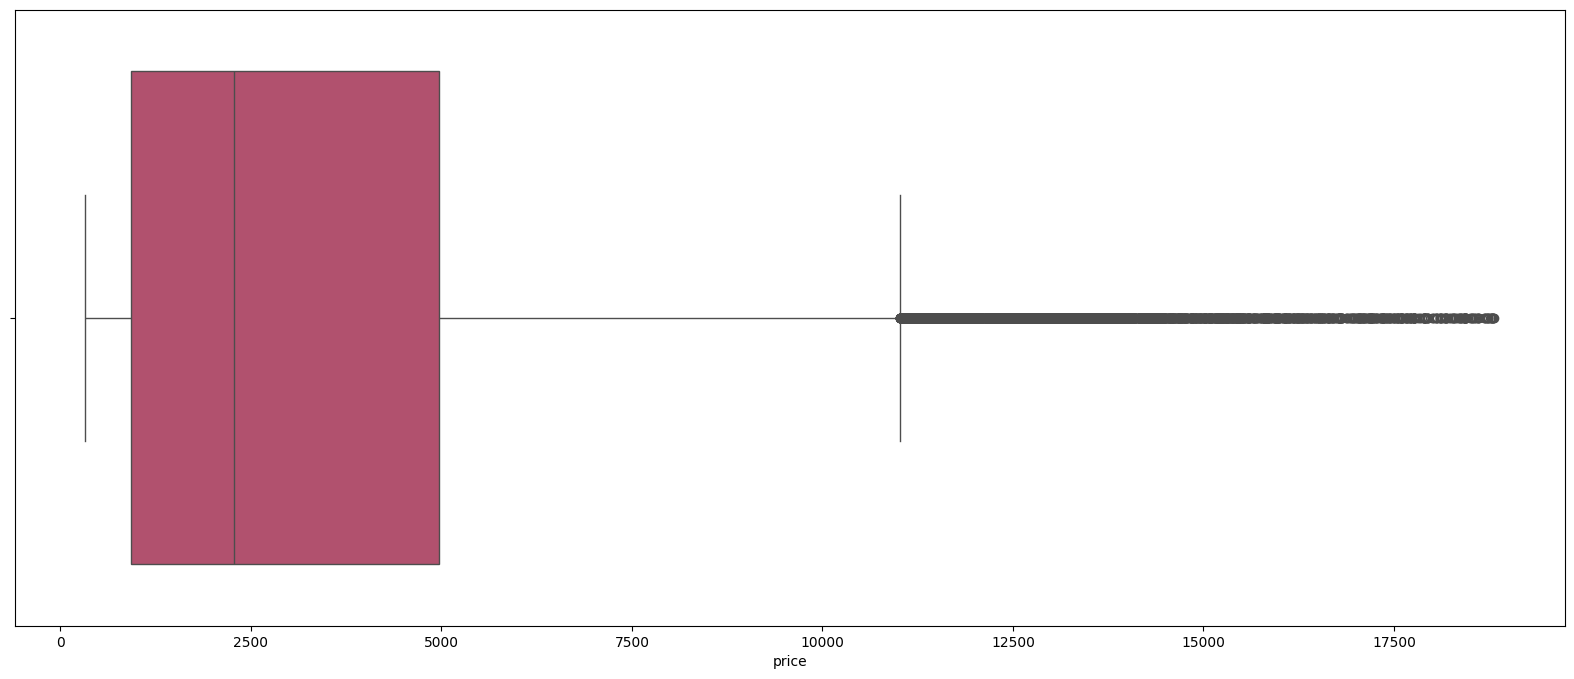

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), sharex=False, sharey=False)
sns.boxplot(diamonds['price'],palette='flare', orient='h')

In [68]:
price_q1, price_q3 = diamonds.price.quantile(.25) , diamonds.price.quantile(.75)
price_upper = price_q3 + (price_q3 - price_q1)*1.5
price_upper

11018.0

Para a identificação de outliers, foi-se utilizado o IQR (intervalo interquartil), que nos trouxe a seguinte quantidade de valores:

In [69]:
diamonds[diamonds.price > price_upper]

,carat,cut,color,clarity,depth,table,price,x,y,z
22968,1.07,Very Good,F,IF,59.4,59.0,11019,6.64,6.70,3.96
22969,1.63,Ideal,I,VS2,61.9,54.3,11019,7.54,7.58,4.68
22970,1.21,Ideal,D,VS1,60.1,60.0,11019,6.92,6.99,4.18
22971,1.74,Premium,I,SI1,58.7,60.0,11020,7.90,7.84,4.62
22972,1.20,Premium,F,VVS2,62.2,58.0,11021,6.83,6.78,4.23
...,...,...,...,...,...,...,...,...,...,...
27740,1.71,Premium,F,VS2,62.3,59.0,18791,7.57,7.53,4.70
27743,2.00,Premium,I,VS1,60.8,59.0,18795,8.13,8.02,4.91
27745,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27747,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56


In [70]:
diamonds.drop(diamonds[diamonds.price > price_upper].index, inplace= True)

Plotando o gráfico novamente:

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\1124197547.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(diamonds['price'],palette='flare', orient='h')


<Axes: xlabel='price'>

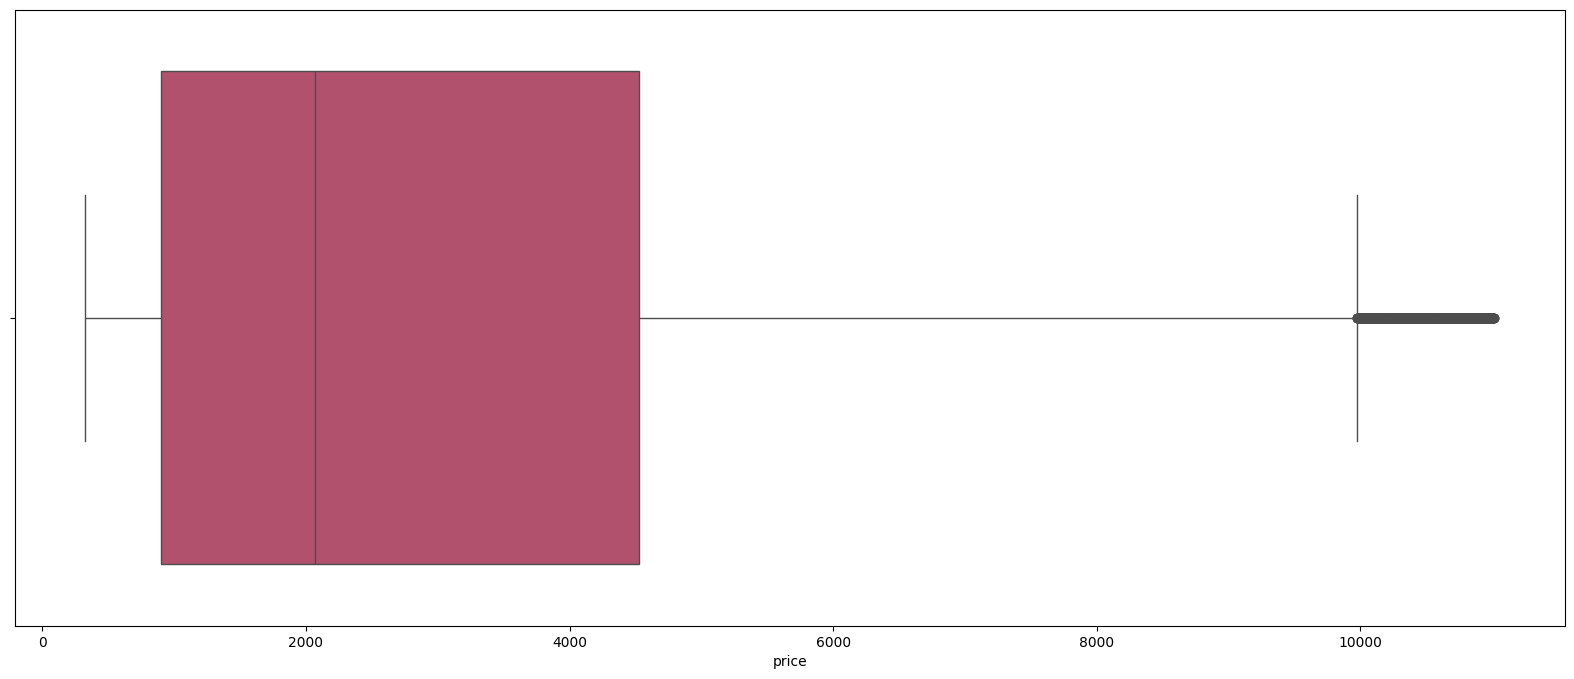

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,8), sharex=False, sharey=False)
sns.boxplot(diamonds['price'],palette='flare', orient='h')

##### Preço para corte, cor e pureza:

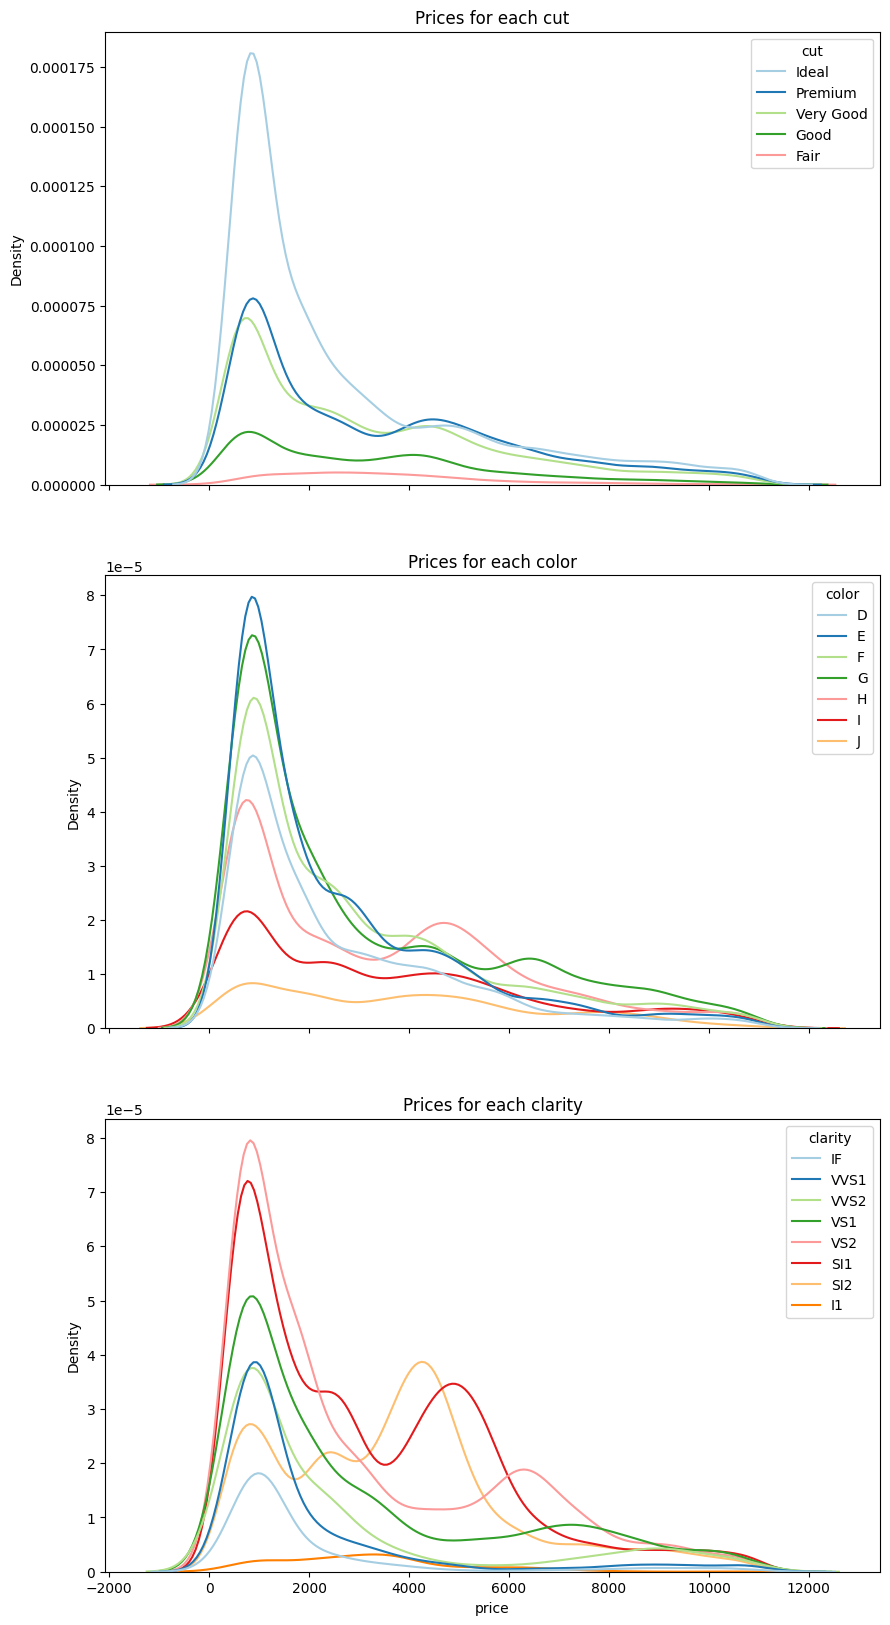

In [72]:
cat_col = ['cut', 'color', 'clarity']
fig, axes = plt.subplots(nrows=len(cat_col), ncols=1, figsize=(10, 20), sharex=True)
for i in range(len(cat_col)):
    sns.kdeplot(data=diamonds, x='price', hue=cat_col[i], palette='Paired', ax=axes[i]).set_title(f'Prices for each {cat_col[i]}')
plt.show()


#### Correlação entre preço e caracteristicas:

Primeiramente, para poder trabalhar com todas as caracteristicas será necessário transformar as colunas categóricas em númericos, correspondentes a sua ordem de qualidade.

In [73]:
dict_cut = dict((k,v) for v, k in enumerate(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal')))
dict_color = dict((k,v) for v, k in enumerate('DEFGHIJ'[::-1]))
dict_clarity = dict((k,v) for v, k in enumerate(('I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF')))

In [74]:
diamonds.replace({'cut': dict_cut}, inplace=True)
diamonds.replace({'color': dict_color}, inplace=True)
diamonds.replace({'clarity': dict_clarity}, inplace=True)
diamonds[['cut','color','clarity']] = diamonds[['cut','color','clarity']].astype('category')
diamonds.head()

C:\Users\artur\AppData\Local\Temp\ipykernel_17320\2944568427.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  diamonds.replace({'cut': dict_cut}, inplace=True)
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\2944568427.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  diamonds.replace({'cut': dict_cut}, inplace=True)
C:\Users\artur\AppData\Local\Temp\ipykernel_17320\2944568427.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infe

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,5,62.8,57.0,336,3.94,3.96,2.48


Assim, podemos plotar o gráfico:

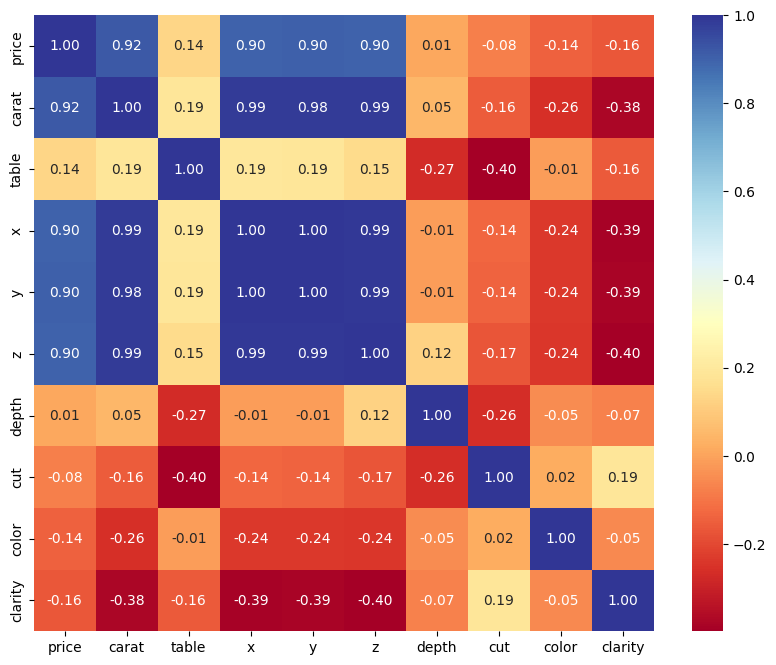

In [75]:
num_col = ['carat', 'table', 'x','y','z', 'depth']
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,8))
sns.heatmap(pd.concat([diamonds['price'], diamonds[num_col], diamonds[cat_col].astype('int')], axis=1).corr(), cmap="RdYlBu", annot=True, fmt=".02f")
plt.show()

Como podemos ver no Heatmap, o preço apresenta alta correlação com os valores de X, Y, Z e o Carat. Já as outras caracteristicas como depth, cut, color e clarity não influenciam no valor do diamante.

### Teste de Hipótese: